In [68]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
data = 'https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv'

In [70]:
!wget $data

--2024-11-03 13:53:13--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-03 13:53:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv.1’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.006s  

2024-11-03 13:53:13 (64.3 MB/s) - ‘jamb_exam_resu

In [71]:
!head jamb_exam_results.csv

JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,None,1
182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
202,25,85,2,13.6,Public,Urban,Yes,No,Medium,Low,6,15,Male,Low,Tertiary,1
251,35,85,4,2.6,Public,Urban,No,Yes,Low,Medium,7,16,Female,Medium,Primary,4
129,27,75,3,9.4,Public,Urban,No,Yes,Low,Medium,8,19,Female,Low,Tertiary,3
220,23,85,3,4.6,Public,Rural,No,No,Low,Medium,9,19,Female,Medium,Tertiary,1


In [72]:
df = pd.read_csv(data)

In [73]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


# Preparing the dataset

In [74]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    
df

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,public,urban,yes,yes,high,medium,1,17,male,low,tertiary,2
1,207,14,88,4,2.7,public,rural,no,yes,high,high,2,15,male,high,NaN,1
2,182,29,87,2,9.6,public,rural,yes,yes,high,medium,3,20,female,high,tertiary,2
3,210,29,99,2,2.6,public,urban,no,yes,medium,high,4,22,female,medium,tertiary,1
4,199,12,98,3,8.8,public,urban,no,yes,medium,medium,5,22,female,medium,tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,public,urban,yes,no,low,low,4996,16,male,medium,primary,2
4996,179,0,80,2,20.0,public,rural,no,yes,medium,medium,4997,22,male,low,secondary,1
4997,261,17,89,3,11.3,public,urban,no,no,low,high,4998,18,male,medium,primary,3
4998,183,15,96,2,15.9,public,rural,no,no,low,medium,4999,18,male,medium,secondary,1


In [75]:
df = df.drop('student_id', axis = 1)

<Axes: xlabel='jamb_score', ylabel='Count'>

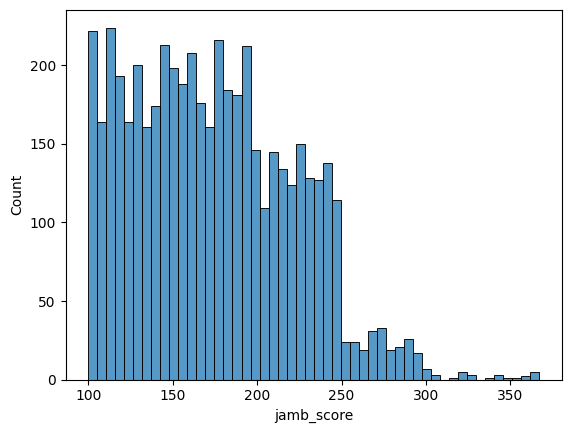

In [76]:
sns.histplot(df.jamb_score, bins=50)

In [77]:
df.dtypes

jamb_score                        int64
study_hours_per_week              int64
attendance_rate                   int64
teacher_quality                   int64
distance_to_school              float64
school_type                      object
school_location                  object
extra_tutorials                  object
access_to_learning_materials     object
parent_involvement               object
it_knowledge                     object
age                               int64
gender                           object
socioeconomic_status             object
parent_education_level           object
assignments_completed             int64
dtype: object

In [78]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [79]:
df = df.fillna(0)
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,public,urban,yes,yes,high,medium,17,male,low,tertiary,2
1,207,14,88,4,2.7,public,rural,no,yes,high,high,15,male,high,0,1
2,182,29,87,2,9.6,public,rural,yes,yes,high,medium,20,female,high,tertiary,2
3,210,29,99,2,2.6,public,urban,no,yes,medium,high,22,female,medium,tertiary,1
4,199,12,98,3,8.8,public,urban,no,yes,medium,medium,22,female,medium,tertiary,1


In [80]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [81]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [82]:
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [83]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [84]:
df_train

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,72,3,4.4,public,urban,no,yes,medium,low,21,female,low,0,3
1,11,80,2,3.3,public,urban,yes,yes,medium,high,22,female,medium,secondary,1
2,31,82,1,8.3,public,urban,yes,yes,low,high,19,female,high,tertiary,2
3,29,79,1,15.8,public,rural,yes,yes,low,low,19,male,low,primary,2
4,28,96,2,8.9,private,rural,yes,yes,medium,low,19,male,high,secondary,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,79,3,12.2,public,urban,no,no,low,high,17,male,high,secondary,1
2996,3,87,1,9.6,public,urban,no,no,medium,medium,17,male,medium,primary,1
2997,17,96,4,13.7,private,urban,no,yes,high,medium,16,male,medium,primary,2
2998,25,74,2,3.4,public,rural,no,no,high,high,21,male,low,secondary,1


In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import export_text

In [86]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse = True)
X_train = dv.fit_transform(train_dicts)

In [87]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [88]:
print(export_text(dtr, feature_names=list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rfr = RandomForestRegressor(
    n_estimators=10,
    random_state=1,
    n_jobs=-1)

rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [91]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [92]:
y_pred = rfr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print('RMSE on validation:', rmse)

RMSE on validation: 42.13724207871227


In [93]:
scores =[]

for n in range(10, 201, 10) :
    rfr = RandomForestRegressor(
    n_estimators=n_estimators,
    random_state=1,
    n_jobs=-1)

    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    
    rmse = root_mean_squared_error(y_val, y_pred)
    scores.append((n, round(rmse,3)))

In [95]:
scores

[np.float64(42.137),
 np.float64(41.461),
 np.float64(41.106),
 np.float64(40.917),
 np.float64(40.852),
 np.float64(40.784),
 np.float64(40.677),
 np.float64(40.539),
 np.float64(40.504),
 np.float64(40.517),
 np.float64(40.593),
 np.float64(40.625),
 np.float64(40.651),
 np.float64(40.595),
 np.float64(40.597),
 np.float64(40.604),
 np.float64(40.628),
 np.float64(40.641),
 np.float64(40.631),
 np.float64(40.601)]

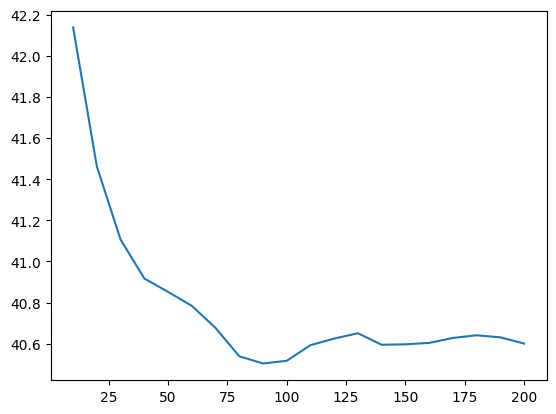

In [96]:
columns = ['n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

plt.plot(df_scores.n_estimators, df_scores.rmse)

In [ ]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rmse_values = []
        rfr = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=1,
        n_jobs=-1)
        
        rfr.fit(X_train, y_train)
    
        y_pred = rfr.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        rmse_values.append(rmse)
    scores.append((d, rmse_values.mean))

In [ ]:
columns = ['max_depth', 'mean_rmse']
df_scores = pd.DataFrame(scores, columns=columns)

plt.plot(df_scores.max_depth, df_scores.mean_rmse)